In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
wd = '/content/drive/MyDrive/CodeitDA7/파트 3/00_Project'
os.chdir(wd)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (27.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

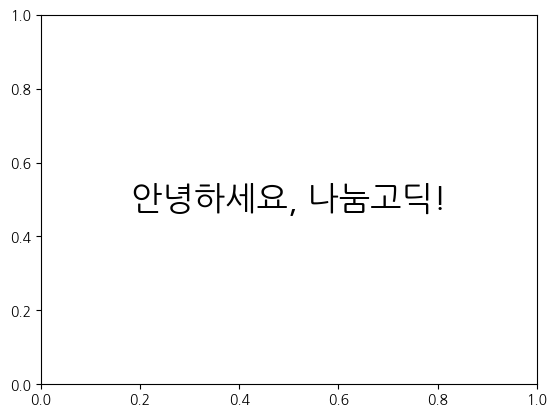

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트를 설치합니다.
!apt-get install -y fonts-nanum
!fc-cache -fv

# 설치된 나눔고딕 폰트를 matplotlib에 등록합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 폰트가 잘 설정되었는지 테스트합니다.
plt.text(0.5, 0.5, '안녕하세요, 나눔고딕!', ha='center', va='center', size=24)
plt.show()

In [ ]:
from matplotlib import font_manager
[f.name for f in font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumGothic']

# 데이터 확인

* site_area: 지점별 면적
* trial_access_log: 3일 체험 신청자 출입 기록, 출입방향
* trial_payment: 3일 체험 신청자 결제 여부
* trial_register: 3일 체험 신청 일시
* trial_visit_info: 3일 체험 신청자 일자별 방문 기록, 최초입실시각, 최종퇴실시각, 체류시간

In [ ]:
site_area_df = pd.read_csv('site_area.csv')
trial_access_log_df = pd.read_csv('trial_access_log.csv')
trial_payment_df = pd.read_csv('trial_payment.csv')
trial_register_df = pd.read_csv('trial_register.csv')
trial_visit_info_df = pd.read_csv('trial_visit_info.csv')

# 데이터 전처리

## 결측치 확인

In [ ]:
trial_visit_info_df.isna().sum()

,0
site_id,0
date,0
stay_time,0
stay_time_second,0
first_enter_time,555
last_leave_time,555
user_uuid,0


In [ ]:
trial_visit_info_df[trial_visit_info_df.isna().any(axis=1)]

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid
342,1,2021-06-03,03:43:06.377172,13386,NaN,NaN,91bded23-9587-46f8-91bf-62872c06f95e
343,4,2021-06-01,06:51:00.013723,24660,NaN,NaN,91bded23-9587-46f8-91bf-62872c06f95e
344,4,2021-06-02,00:19:07.855184,1147,NaN,NaN,91bded23-9587-46f8-91bf-62872c06f95e
736,3,2021-06-25,01:24:23.577860,5063,NaN,NaN,67a52b62-0441-4b12-94a5-3e601bf0f4c0
737,3,2021-06-24,02:17:26.786498,8246,NaN,NaN,67a52b62-0441-4b12-94a5-3e601bf0f4c0
...,...,...,...,...,...,...,...
7911,4,2021-06-11,02:24:32.228295,8672,NaN,NaN,3e074769-5679-4203-abd0-af6ed7434ae3
7919,4,2021-06-01,06:40:46.952049,24046,NaN,NaN,1186287e-6157-4407-ba71-c1906dafd8da
7920,4,2021-06-15,02:23:31.030548,8611,NaN,NaN,6d91f4d4-2bc2-423b-9576-176b6c1ae367
7921,4,2021-05-28,03:43:24.066792,13404,NaN,NaN,f45a5e3d-8305-42ab-8947-1343cc706002


In [ ]:
np.sort(trial_visit_info_df[trial_visit_info_df.isna().any(axis=1)]['date'].unique())

array(['2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
       '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
       '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
       '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
       '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
       '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
       '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
       '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02',
       '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06',
       '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
       '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
       '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
       '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22',
       '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26',
       '2021-06-27', '2021-06-28', '2021-06-29'], dtype=object)

* 'trial_visit_info' 무료 체험 신청자들의 일자별 방문 기록 테이블에 'stay_time'은 기록되어 있으나, 출입 기록이 NaN인 데이터가 555개 존재함
* 2021년 5월 2일~6월 29일 동안 발생한 데이터 수집 문제인 것으로 보임
* 그 외 테이블에 결측치 없음
* 상세 출입 기록은 분석에 사용하지 않아, 결측치는 따로 제거하지 않기로 함

## 중복 데이터 확인

In [ ]:
trial_access_log_df[trial_access_log_df.duplicated()]

,id,checkin,cdate,site_id,user_uuid
2217,2099278,2,2023-11-24 02:49:24.605801,1,906b191d-ccfe-45ab-9233-6445f631d1d1
2219,2098815,1,2023-11-24 00:57:17.913935,1,906b191d-ccfe-45ab-9233-6445f631d1d1
2221,2099031,2,2023-11-24 01:52:13.122963,1,906b191d-ccfe-45ab-9233-6445f631d1d1
2223,2098812,1,2023-11-24 00:56:59.550599,1,906b191d-ccfe-45ab-9233-6445f631d1d1
2225,2099070,1,2023-11-24 01:58:30.899001,1,906b191d-ccfe-45ab-9233-6445f631d1d1
...,...,...,...,...,...
63535,2155651,1,2023-12-16 09:21:56.921117,49,b981ed1d-7695-4a31-b0e8-347ec0011de9
63537,2155652,2,2023-12-16 09:25:36.240881,49,b981ed1d-7695-4a31-b0e8-347ec0011de9
63539,2155646,2,2023-12-16 09:18:38.006195,49,b981ed1d-7695-4a31-b0e8-347ec0011de9
63541,2155530,2,2023-12-16 08:20:52.737393,49,b981ed1d-7695-4a31-b0e8-347ec0011de9


* 'trial_access_log_df' 출입 기록 테이블에 359개의 중복 데이터 존재함
* 데이터 내용 특성상 앱의 데이터 수집 오류로 추측됨

In [ ]:
trial_payment_df[trial_payment_df.duplicated()]

,is_payment,user_uuid
18,0,56231301-3408-4206-962d-aaa25a342821
22,0,4c5b26a3-24d4-4b8f-a591-be80271c0aeb
28,0,204ecb60-f9e3-42b4-ae7a-f1f00c939894
30,0,d9fc9841-6383-410e-9d76-2862f1b6e1af
100,0,acf3e288-4487-492b-9477-df149fb72e83
104,0,19c8e329-9654-4178-989d-c93617655650
114,0,2c76e1c0-4996-48c0-9d80-1f3bd206a23d
133,0,039fa563-fc65-4b0c-9087-4beb5cd17fd7
136,0,906b191d-ccfe-45ab-9233-6445f631d1d1
163,0,66fc8afa-ba4f-44dd-b882-f62d6bb98d39


In [ ]:
trial_payment_df.duplicated().sum()

np.int64(35)

In [ ]:
trial_payment_df.duplicated(subset='user_uuid').sum()

np.int64(35)

* 'trial_payment_df'의 중복되는 35개의 데이터는 대부분 연속해 있는 것으로 보아 앱의 데이터 수집 오류로 추정됨



In [ ]:
trial_register_df.duplicated().sum()

np.int64(28)

In [ ]:
trial_register_df.duplicated(subset='user_uuid').sum()

np.int64(35)

In [ ]:
# 1. user_uuid별로 trial_date의 고유 개수 계산
date_counts = trial_register_df.groupby('user_uuid')['trial_date'].nunique().reset_index()

# 2. trial_date가 2개 이상인 user_uuid만 필터링
multi_trial_users = date_counts[date_counts['trial_date'] > 1]['user_uuid']

# 3. 해당 user_uuid들의 원본 행 추출
trial_register_multi_trials = trial_register_df[trial_register_df['user_uuid'].isin(multi_trial_users)]

# 4. 결과 확인
print("중복 신청자 수:", multi_trial_users.nunique())
trial_register_multi_trials.sort_values(['user_uuid', 'trial_date'])

중복 신청자 수: 7


,trial_date,user_uuid
5624,2022-01-28,14872783-3af7-492a-b51c-12f3003b76f1
5625,2023-02-10,14872783-3af7-492a-b51c-12f3003b76f1
1682,2021-09-06,4008307f-486f-408f-b90b-e01398972029
1683,2022-03-25,4008307f-486f-408f-b90b-e01398972029
3554,2022-03-14,5b16f32b-3344-4b39-b2bf-8cf1caac78fa
3555,2023-03-22,5b16f32b-3344-4b39-b2bf-8cf1caac78fa
4968,2022-09-05,6a88014b-fbbd-4e73-8036-04435c062a97
4969,2023-02-10,6a88014b-fbbd-4e73-8036-04435c062a97
4674,2022-08-02,bd3ed6c2-f139-4e0c-b53e-b956101b2822
4675,2022-10-21,bd3ed6c2-f139-4e0c-b53e-b956101b2822


* 'trial_register_df'의 전체 값이 중복되는 데이터 28개는 앱의 데이터 수집 오류로 추정됨
* 'user_uuid'만 중복되는 데이터는 7개로 확인됨


In [ ]:
trial_visit_info_df.duplicated().sum()

np.int64(48)

* 'trial_visit_info_df'의 전체 값이 중복되는 데이터 48개는 앱의 데이터 수집 오류로 추정됨

## 중복 데이터 처리
* 'trial_access_log_df': 분석에 사용하지 않음
* 'trial_payment_df': 중복 데이터 삭제(keep='last')
* 'trial_register_df': 'user_uuid' 기준으로 삭제(keep='last')
* 'trial_visit_info_df': 중복 데이터 삭제(keep='last')

In [ ]:
#  날짜 컬럼 형식 datetime으로 변경
trial_visit_info_df['date'] = pd.to_datetime(trial_visit_info_df['date'])

# 날짜 순 오름차순 정렬 후 마지막 방문이력을 남기고 중복값 제거
trial_visit_info_df = trial_visit_info_df.sort_values(by='date')
drop_visit_df = trial_visit_info_df.drop_duplicates(subset='user_uuid', keep='last')
drop_visit_df.shape

# 데이터셋 생성

In [ ]:
# 컬럼 순서 변경 및 선택
new_order = ['user_uuid', 'date', 'stay_time_second', 'site_id']

# 기존 DataFrame에서 순서 바꿔서 재지정
user_df = drop_visit_df[new_order].reset_index(drop=True)
user_df

In [ ]:
# 날짜 피쳐 생성
user_df.loc[:, 'visit_year'] = user_df['date'].dt.year
user_df.loc[:, 'visit_month'] = user_df['date'].dt.month
user_df.loc[:, 'visit_year_month'] = user_df['date'].dt.to_period('M')
user_df.loc[:, 'visit_dayofweek'] = user_df['date'].dt.dayofweek # 0 : 월요일, 6 : 일요일

In [ ]:
user_df['weekdays'] = user_df['visit_dayofweek'].apply(lambda x: 1 if 0 <= x <= 4 else 0)
user_df['holiday'] = user_df['visit_dayofweek'].apply(lambda x: 1 if 5 <= x <= 6 else 0)

In [ ]:
# 지점 기본정보(면적, 이름) 추가
user_df = pd.merge(user_df, site_area_df, on='site_id', how='left')
user_df

In [ ]:
# 체류시간 단위 변경 second -> minute
user_df.loc[:,'stay_time_minute'] = np.ceil(user_df['stay_time_second']/60)

In [ ]:
# 총 체류시간
stay_df = trial_visit_info_df.groupby('user_uuid')['stay_time_second'].sum().reset_index()
stay_df['total_stay_time_minute'] = np.ceil(stay_df['stay_time_second']/60)
stay_df

In [ ]:
# 방문일수 계산
date_cnt_df = trial_visit_info_df.groupby('user_uuid')['date'].nunique().reset_index(name='date_cnt')

date_cnt_df

In [ ]:
# 일평균 체류시간 계산
merged_df = pd.merge(stay_df,date_cnt_df,on='user_uuid', how='left')
merged_df['oneday_stay_time_minute'] = np.ceil(merged_df['total_stay_time_minute']/merged_df['date_cnt'])
merged_df

In [ ]:
drop_visit_df.isna().sum()

In [ ]:
drop_visit_df['first_enter_time'] = pd.to_datetime(drop_visit_df['first_enter_time'], format='mixed')
drop_visit_df['entertime'] = drop_visit_df['first_enter_time'].dt.hour
drop_visit_df['entertime'].unique()

In [ ]:
# 방문 시간대
entertime = drop_visit_df[['user_uuid', 'entertime']]
entertime

In [ ]:
# 총 방문일수
visit_cnt = trial_visit_info_df['user_uuid'].value_counts().reset_index(name='count')
visit_cnt

,user_uuid,count
0,4eec8463-d053-44a1-942d-f79e90d3a106,6
1,4ba37b4f-1239-4107-8f03-395dff5da4b8,5
2,3c7ceff8-ea38-470f-b560-00bc8f809e3b,5
3,e6bf43d9-9688-4c71-9979-be67f96aa3c9,5
4,347afd7a-30e4-4eae-92c4-8e4da847ed05,5
...,...,...
6529,01cf3e09-9b2d-4d82-a50d-e6ccc03c33a2,1
6530,409513f7-9c87-484f-b8d8-f17e71014e90,1
6531,af90ff0b-d60b-4386-9c62-05c0e70cdf4a,1
6532,f91e09e9-13aa-4823-a6a5-c198773bced6,1


In [ ]:
# 데이터 합쳐서 저장
# df.to_csv('basic_df.csv')

In [ ]:
basic_df = pd.read_csv('basic_df.csv', index_col='Unnamed: 0')
basic_df.head()

In [ ]:
# 폐점 여부 추가
basic_df.insert(basic_df.columns.get_loc('site_name') + 1, 'is_shut_down', basic_df['site_name'].apply(lambda x: 1 if x in ['서울대입구', '석촌', '목동'] else 0))
basic_df.head(3)

In [ ]:
# 컬럼 제거(의미 중복)
basic_df = basic_df.drop(columns='visit_year_month')
basic_df.head(3)

In [ ]:
# 지점 환경 정보
info = pd.read_csv('project_info.csv')
info

In [ ]:
# info 내부 값 변경 (서울대 → 서울대입구)
info['name'] = info['name'].replace({'서울대': '서울대입구'})

# merge 기준 컬럼명 일치
info_renamed = info.rename(columns={'name': 'site_name', 'subway': 'subway_m'})

# 필요 컬럼만 추출
info_subset = info_renamed[['site_name', 'bus_300', 'subway_m']]

# merge
basic_df = basic_df.merge(info_subset, on='site_name', how='left')

In [ ]:
# 방문까지 소요 일수 추가
trial_register_df = pd.read_csv('trial_register.csv')
trial_visit_info_df = pd.read_csv('trial_visit_info.csv')

In [ ]:
trial_register_df['trial_date'] = pd.to_datetime(trial_register_df['trial_date'])
trial_visit_info_df['date'] = pd.to_datetime(trial_visit_info_df['date'])

trial_register_df = trial_register_df.sort_values(by='trial_date')
trial_visit_info_df = trial_visit_info_df.sort_values(by='date')

In [ ]:
trial_register_df = trial_register_df.drop_duplicates(subset='user_uuid', keep='last')
trial_visit_info_df = trial_visit_info_df.drop_duplicates(keep='last')

In [ ]:
# 3일 체험 등록-방문 매핑
merged2 = pd.merge(trial_register_df, trial_visit_info_df, on='user_uuid', how='inner')
merged_visited = merged2[merged2['date'].notnull()]
merged_visited

In [ ]:
# 일수 차이 계산
merged_visited['days_between_trial_and_visit'] = (merged_visited['date'] - merged_visited['trial_date']).dt.days

In [ ]:
# (1) 필요 컬럼 추출
delay_map = merged_visited[['user_uuid', 'site_name', 'date', 'days_between_trial_and_visit']]

# (2) 방문일자 기준으로 오름차순 정렬 → 가장 오래된 방문이 위에 오도록
delay_map = delay_map.sort_values(by='date')

# (3) 중복 제거: 가장 오래된(처음) 방문 기록 사용
delay_map = delay_map.drop_duplicates(subset=['user_uuid', 'site_name'], keep='first')

# (4) join: user_uuid + site_name 기준
basic_df = basic_df.merge(delay_map[['user_uuid', 'site_name', 'days_between_trial_and_visit']],
                          on=['user_uuid', 'site_name'], how='left')

# (5) 컬럼명 정리
basic_df = basic_df.rename(columns={'days_between_trial_and_visit': 'days_until_visit'})

In [ ]:
humidity_df = pd.read_csv('humidity_df.csv') # 습도 데이터
date_cnt_df = pd.read_csv('date_cnt_df.csv') # 방문 일수 데이터
user_unique_sites = pd.read_csv('user_unique_sites.csv') # 방문 지점 수

In [ ]:
pop_stats = pd.read_excel('최종_동별통계_소상공인365_eng.xlsx')
pop_stats

In [ ]:
# (1) address 제외하고 필요한 컬럼만 추출
pop_stats_subset = pop_stats.drop(columns=['address'])

# (2) basic_df에 병합 (site_name 기준)
basic_df = basic_df.merge(pop_stats_subset, on='site_name', how='left')

In [ ]:
# 방문 시간대 추가
entertime_df = pd.read_csv('entertime_df.csv', index_col='Unnamed: 0')
entertime_df

In [ ]:
# (1) user_uuid 기준으로 병합
basic_df = basic_df.merge(entertime_df.rename(columns={'entertime': 'enter_time'}),
                          on='user_uuid', how='left')

# (2) 'enter_time' 컬럼을 'holiday' 다음 위치로 이동
# 현재 컬럼 순서
cols = list(basic_df.columns)

# 'holiday' 다음 위치 계산
idx = cols.index('holiday') + 1

# 'enter_time'을 제외한 나머지 컬럼
cols.remove('enter_time')

# 새로운 순서로 재배치
new_cols = cols[:idx] + ['enter_time'] + cols[idx:]

# 컬럼 순서 재정렬
basic_df = basic_df[new_cols]

In [ ]:
basic_df_processed = basic_df.dropna(subset=['enter_time'])
basic_df_processed.head(3)

In [ ]:
pop_stats2 = pd.read_excel('최종_동별통계(카페수 반영)_소상공인365_eng.xlsx')
pop_stats2

In [ ]:
# (1) 필요한 컬럼만 추출
pop_stats2_subset = pop_stats2[['site_name', 'café', 'study_café']]

# (2) basic_df에 병합 (site_name 기준)
basic_df_processed = basic_df_processed.merge(pop_stats2_subset, on='site_name', how='left')

In [ ]:
# 평균 기온 추가
temp = pd.read_csv('temperature_기상청.csv')
temp

In [ ]:
# NaN값인 마지막 행 제거
temp = temp.dropna(how='any').copy()

In [ ]:
# (1) 앞의 탭 문자 제거 (공백 포함 모든 공백 문자 제거)
temp['visit_year_month'] = temp['visit_year_month'].str.strip()

# (2) 연도와 월을 분리
temp[['visit_year', 'visit_month']] = temp['visit_year_month'].str.extract(r'(\d{4})-(\d{2})')

# (3) 숫자형으로 변환
temp['visit_year'] = temp['visit_year'].astype(int)
temp['visit_month'] = temp['visit_month'].astype(int)

# (4) 병합
basic_df_processed = basic_df_processed.merge(
    temp[['visit_year', 'visit_month', 'temperature']],
    on=['visit_year', 'visit_month'],
    how='left')

In [ ]:
# 컬럼명 변경
basic_df_processed = basic_df_processed.rename(columns={'Consumption': 'consumption'})
basic_df_processed.head(3)

In [ ]:
basic_df_processed.to_csv('/content/drive/MyDrive/CodeitDA7/파트 3/00_Project/basic_df_processed.csv', index=False)

In [ ]:
df_ver2 = pd.read_csv('basic_df_processed.csv')

In [ ]:
# 추가 데이터
humidity_df = pd.read_csv('humidity_df.csv') # 습도 데이터
date_cnt_df = pd.read_csv('date_cnt_df.csv') # 방문 일수 데이터
user_unique_sites = pd.read_csv('user_unique_sites.csv') # 방문 지점 수

In [ ]:
# 습도 데이터 추가
df_ver2['visit_year_month'] = df_ver2['visit_year'].astype(str) + '_' + df_ver2['visit_month'].astype(str)
df_ver2 = pd.merge(df_ver2, humidity_df, on='visit_year_month', how='left')

In [ ]:
# 월을 계절로 매핑
df_ver2['season'] = df_ver2['visit_month'].map({
    12: 4, 1: 4, 2:4,
    3: 1, 4: 1, 5: 1,
    6: 2, 7: 2, 8: 2,
    9: 3, 10:3, 11: 3
})

In [ ]:
# 방문 일수 데이터 추가
df_ver2 = pd.merge(df_ver2,date_cnt_df,on='user_uuid',how='left')

In [ ]:
# 방문 지점수 데이터 추가
df_ver2 = pd.merge(df_ver2,user_unique_sites,on='user_uuid',how='left')

In [ ]:
col_order=['user_uuid', 'visit_year', 'visit_month', 'visit_dayofweek',                                       # 방문일
           'enter_time', 'stay_time', 'total_stay_time', 'oneday_stay_time',                                  # 방문시간
           'date_cnt', 'unique_site_count', 'days_until_visit',                                               # 방문일수, 방문지점수, 방문까지 걸린 시간
           'site_name', 'area_pyeong',  'bus_300', 'subway_m',                                                # 지점특징 및 교통
           'sales','floating_popul', 'households','working_popul', 'residential_popul', 'café', 'study_café', # 상권정보
           'temperature', 'season', 'humidity', 'is_payment']                                                 # 온도, 습도, 계절

In [ ]:
df_ver2 = df_ver2[col_order]

In [ ]:
cols = ['unique_site_count']
for col in cols:
    df_ver2[col] = df_ver2[col].fillna(df_ver2[col].median())

# 모델링

In [ ]:
# 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_curve,
                             auc,
                             roc_auc_score,
                             confusion_matrix,
                             classification_report)

In [ ]:
# 순환형인코딩
cyclical_encoding_cols  = ['visit_month', 'visit_dayofweek', 'season', 'enter_time']

# 원핫인코딩
onehot_encoding_cols  = ['visit_year', 'site_name']

# 순환형 인코딩 적용
def cyclical_encode(df, col, max_val):
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

# 적용할 컬럼과 주기 정의
cyclical_cols = {
    'visit_month': 12,        # 1~12월
    'visit_dayofweek': 7,     # 0~6 (월~일)
    'season': 4,              # 봄, 여름, 가을, 겨울
    'enter_time': 24          # 24시간
}

# 순환형 인코딩 적용
for col, period in cyclical_cols.items():
    df_ver2 = cyclical_encode(df_ver2, col, period)

# 인코딩
df_ver2_dummies = pd.get_dummies(df_ver2, columns=onehot_encoding_cols)
# True -> 1, False -> 0으로 변환
df_ver2_dummies.replace(to_replace=True, value=1, inplace=True)
df_ver2_dummies.replace(to_replace=False, value=0, inplace=True)

In [ ]:
# 피처와 타겟 나누기
X = df_ver2_dummies.drop(columns=['user_uuid','visit_month', 'visit_dayofweek', 'season', 'is_payment', 'enter_time'])
y = df_ver2_dummies['is_payment']

# train data, test data로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 랜덤언더샘플
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# 모델 생성 및 학습
for model in models:
    print(model.__class__.__name__)
    print('------------------')
    model.fit(X_train_rus, y_train_rus)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    print('Train:', round(model.score(X_train_rus, y_train_rus),3))
    print('Test:', round(model.score(X_test, y_test),3))
    print("Accuracy: ", round(accuracy_score(y_test, y_test_pred),3))
    print("Precision: ", round(precision_score(y_test, y_test_pred),3))
    print("Recall: ", round(recall_score(y_test, y_test_pred),3))
    print("F1 Score: ", round(f1_score(y_test, y_test_pred),3))
    print("AUC: ", round(roc_auc_score(y_test, y_test_pred_proba),3))
    print()

In [ ]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_rus, y_train_rus)

# 파라미터 설정
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1.0]
}

# 그리드 서치
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='roc_auc'
)

grid_search.fit(X_train_rus, y_train_rus)

# 베스트 모델로 예측
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:,1]

# 최적모델 파라미터 확인
print(grid_search.best_params_)

# 평가
print('Best Params:', grid_search.best_params_)
print('Accuracy : ', round(accuracy_score(y_test, y_test_pred),3))
print('Precision : ', round(precision_score(y_test, y_test_pred),3))
print('Recall : ', round(recall_score(y_test, y_test_pred),3))
print('F1 score : ', round(f1_score(y_test, y_test_pred),3))
print('AUC : ', round(roc_auc_score(y_test, y_test_proba),3))

In [ ]:
best_params = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train_rus, y_train_rus)

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:,1]

# 평가
print('Accuracy : ', round(accuracy_score(y_test, y_test_pred),3))
print('Precision : ', round(precision_score(y_test, y_test_pred),3))
print('Recall : ', round(recall_score(y_test, y_test_pred),3))
print('F1 score : ', round(f1_score(y_test, y_test_pred),3))
print('AUC : ', round(roc_auc_score(y_test, y_test_proba),3))

In [ ]:
# 속성중요도
importances = best_model.feature_importances_
importances = pd.DataFrame(importances,index=X_train.columns, columns=['importances']).sort_values(by='importances', ascending=False)
importances.reset_index(inplace=True)
importances.columns = ['feature','importance']

importances['importance_ratio'] = importances['importance']/importances['importance'].sum()


# 그룹 키워드 정의하기
group_keywords = ['enter_time', 'stay_time', 'total_stay_time', 'oneday_stay_time',
       'date_cnt', 'unique_site_count', 'days_until_visit',
       'area_pyeong', 'bus_300', 'subway_m', 'sales', 'floating_popul',
       'households', 'working_popul', 'residential_popul', 'café',
       'study_café', 'temperature', 'humidity', 'visit_dayofweek', 'site_name', 'visit_year', 'visit_month', 'season']


# 그룹 매핑하기
def map_feature_group(feature):
    for key in group_keywords:
        if feature.startswith(key):
            return key

# 그룹화할 기준 컬럼 추가
importances['group'] = importances['feature'].apply(map_feature_group)

# 그룹별 중요도 합계 계산
group_importance = importances.groupby('group')['importance_ratio'].sum().reset_index()
group_importance = group_importance.sort_values(by='importance_ratio', ascending=False)
group_importance

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=group_importance, x='group', y='importance_ratio')
plt.title('Feature importance_ratio')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 색상 그룹 지정
purple_vars = [
    'oneday_stay_time', 'stay_time', 'date_cnt', 'enter_time',
    'total_stay_time', 'visit_dayofweek', 'visit_month',
    'days_until_visit', 'visit_year'
]
light_gray_vars = ['temperature', 'humidity', 'season']
gray_vars = [
    'site_name', 'subway_m', 'sales', 'households', 'café',
    'study_café', 'residential_popul', 'floating_popul',
    'working_popul', 'bus_300', 'unique_site_count', 'area_pyeong'
]

# 색상 매핑 함수
def get_color(feature):
    if feature in purple_vars:
        return '#8c52ff'  # 보라색
    elif feature in light_gray_vars:
        return '#d9d9d9'  # 연한 회색
    elif feature in gray_vars:
        return '#9d9d9d'  # 회색
    else:
        return '#cccccc'  # 기본 회색

# 색상 컬럼 추가
group_importance['color'] = group_importance['group'].apply(get_color)

# 한글 라벨 지정 (group_importance의 순서에 맞게!)
korean_labels = [
    '일 평균 이용시간(분)', '마지막 방문 이용시간(분)', '방문 일수', '방문 시간대', '총 이용시간(분)',
    '방문 요일', '방문 월', '방문까지 걸린 일수', '온도', '습도', '방문 연도', '방문 지점',
    '전철역간 거리', '상권 매출', '계절', '지역 가구수', '지역 카페 수', '지역 스터디 카페 수',
    '거주인구수', '유동인구수', '직장인구수', '버스정류장 수', '방문 지점 개수', '지점 면적'
]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_importance,
    x='group',
    y='importance_ratio',
    palette=group_importance.set_index('group')['color'].to_dict()
)

plt.title('')
plt.xlabel('')
plt.ylabel('비율', fontsize=12)
plt.xticks(ticks=range(len(korean_labels)), labels=korean_labels, rotation=90)
plt.grid(axis='y', linestyle=':', alpha=0.5)

# 우측, 상단 테두리 제거
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# EDA

In [ ]:
df = pd.read_csv('df_ver2.csv')
df.head(2)

,user_uuid,visit_year,visit_month,visit_dayofweek,enter_time,stay_time,total_stay_time,oneday_stay_time,date_cnt,unique_site_count,...,floating_popul,households,working_popul,residential_popul,café,study_café,temperature,season,humidity,is_payment
0,cc8ac908-3463-434c-8b4b-369d19f0e749,2021,6,2,0.0,260.0,798.0,266.0,3,1.0,...,166299,17077,23704,30336,90,10,22.8,2,73,1
1,57521fee-05a3-4d93-9e22-9475a9740c19,2021,6,2,20.0,112.0,112.0,112.0,1,1.0,...,166299,17077,23704,30336,90,10,22.8,2,73,0


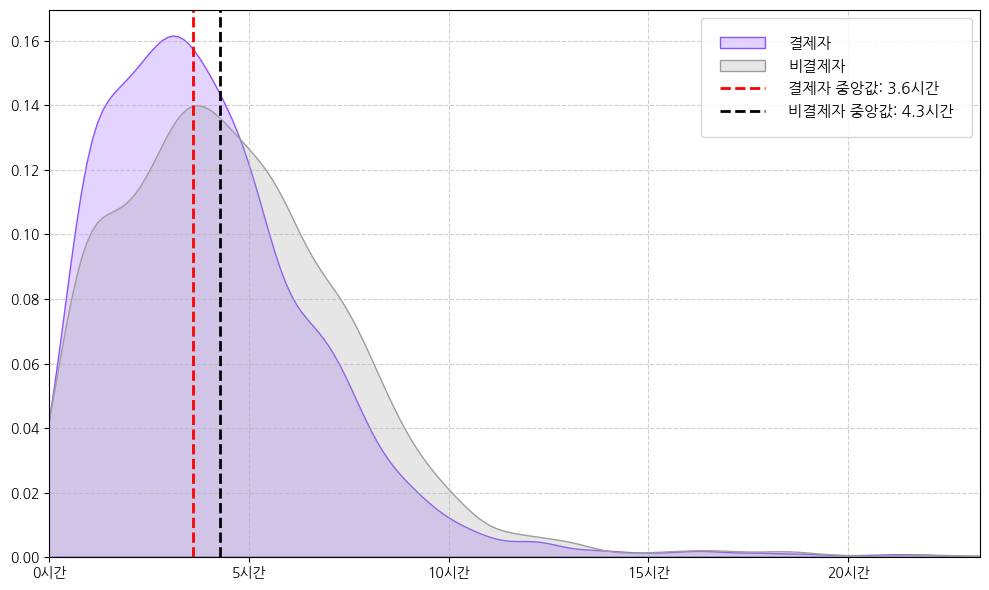

In [ ]:
# 1. 분 → 시간 단위 변환
df['oneday_stay_time_hour'] = df['oneday_stay_time'] / 60

# 2. 결제자 / 비결제자 나누기
paid = df[df['is_payment'] == 1]
unpaid = df[df['is_payment'] == 0]

# 3. 평균 & 중앙값 (단위: 시간)
paid_mean = paid['oneday_stay_time_hour'].mean()
paid_median = paid['oneday_stay_time_hour'].median()
unpaid_mean = unpaid['oneday_stay_time_hour'].mean()
unpaid_median = unpaid['oneday_stay_time_hour'].median()

plt.figure(figsize=(10, 6))

# 4. KDE plot
sns.kdeplot(data=paid, x='oneday_stay_time_hour', fill=True, color='#8c52ff', label='결제자')
sns.kdeplot(data=unpaid, x='oneday_stay_time_hour', fill=True, color='#9d9d9d', label='비결제자')

# 5. 결제자/비결제자 중앙값
plt.axvline(x=paid_median, color='red', linestyle='--', linewidth=2.0, label=f'결제자 중앙값: {paid_median:.1f}시간')
plt.axvline(x=unpaid_median, color='black', linestyle='--', linewidth=2.0, label=f'비결제자 중앙값: {unpaid_median:.1f}시간')

# 6. 시각 설정
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, df['oneday_stay_time_hour'].max())

# → x축 숫자에 '시간' 단위 붙이기
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, _: f'{x:.0f}시간')
plt.gca().xaxis.set_major_formatter(formatter)

# 7. 범례
plt.legend(
    fontsize=11,
    handlelength=3,
    handletextpad=1.5,
    borderpad=1.2,
    loc='upper right'
)

plt.tight_layout()
plt.show()

* 오히려 결제하지 않은 사용자가 평균적으로 더 오랜 시간 서비스를 경험하였음
* 체류 시간이 긴 유저들은 실제로는 서비스 이용 환경이 안 좋았을 수도 있음(예: 좌석 부족, 소음, 네트워크 불편 등) ➡ 오래 있었지만 좋은 인상을 받지 못했을 가능성 고려 필요



In [ ]:
# 나눔고딕을 기본 폰트로 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

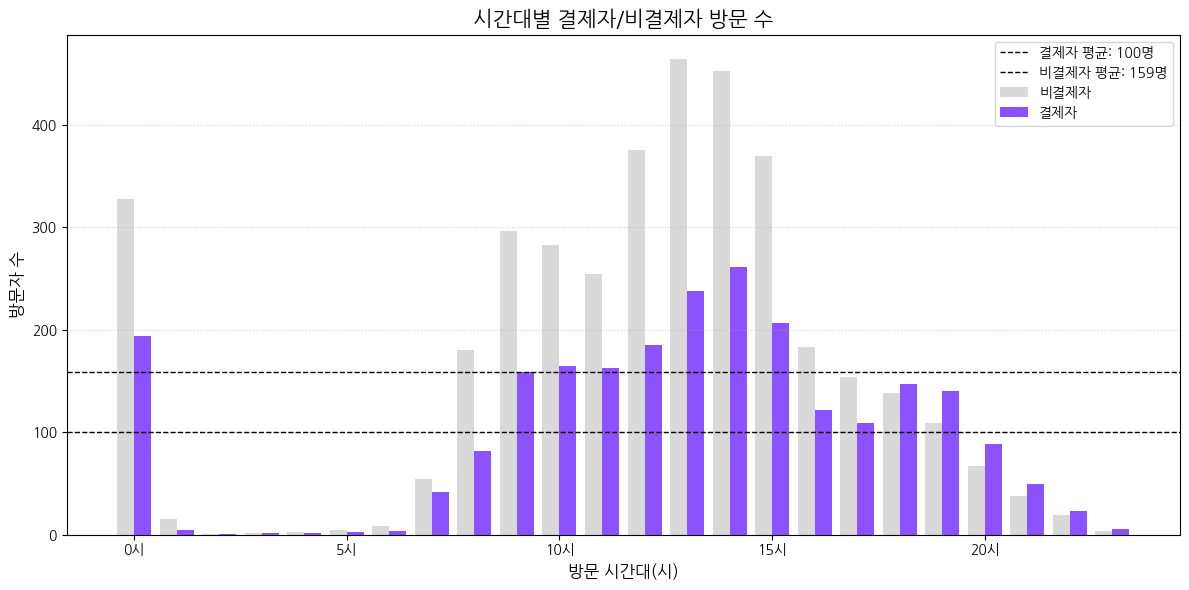

In [ ]:
# 1. 결제 여부별 방문 시간대 그룹화
hourly_counts = df.groupby(['enter_time', 'is_payment']).size().unstack(fill_value=0)

# 2. X축: 시간 (0~23시)
hours = hourly_counts.index.tolist()
paid_counts = hourly_counts[1].tolist()
nonpaid_counts = hourly_counts[0].tolist()

# 3. 평균선 기준 계산 (전체 평균이 아닌, 각 그룹 평균도 가능)
mean_paid = sum(paid_counts) / len(paid_counts)
mean_nonpaid = sum(nonpaid_counts) / len(nonpaid_counts)

# 4. 시각화
bar_width = 0.4
x = range(len(hours))

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], nonpaid_counts, width=bar_width, color='#d9d9d9', label='비결제자')
plt.bar([i + bar_width/2 for i in x], paid_counts, width=bar_width, color='#8c52ff', label='결제자')

# ✅ 평균선 추가 (선택적)
plt.axhline(y=mean_paid, color='black', linestyle='--', linewidth=1, label=f'결제자 평균: {mean_paid:.0f}명')
plt.axhline(y=mean_nonpaid, color='black', linestyle='--', linewidth=1, label=f'비결제자 평균: {mean_nonpaid:.0f}명')

# ✅ X축: 5시간 간격
plt.xticks(ticks=range(0, 24, 5), labels=[f'{h}시' for h in range(0, 24, 5)])
plt.xlabel('방문 시간대(시)', fontsize=12)
plt.ylabel('방문자 수', fontsize=12)
plt.title('시간대별 결제자/비결제자 방문 수', fontsize=15)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

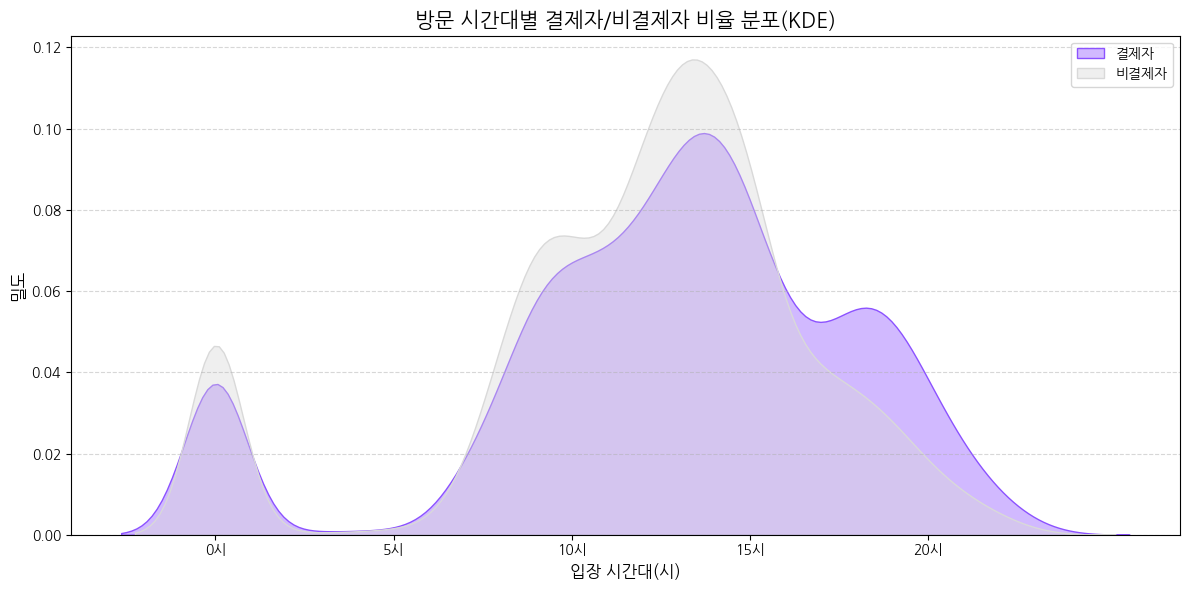

In [ ]:
plt.figure(figsize=(12, 6))

# KDE Plot
sns.kdeplot(data=df[df['is_payment'] == 1], x='enter_time', bw_adjust=0.8,
            label='결제자', fill=True, alpha=0.4, color='#8c52ff')

sns.kdeplot(data=df[df['is_payment'] == 0], x='enter_time', bw_adjust=0.8,
            label='비결제자', fill=True, alpha=0.4, color='#d9d9d9')

# 스타일
# ✅ X축: 5시간 간격
plt.xticks(ticks=range(0, 24, 5), labels=[f'{h}시' for h in range(0, 24, 5)])
plt.xlabel('입장 시간대(시)', fontsize=12)
plt.ylabel('밀도', fontsize=12)
plt.title('방문 시간대별 결제자/비결제자 비율 분포(KDE)', fontsize=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

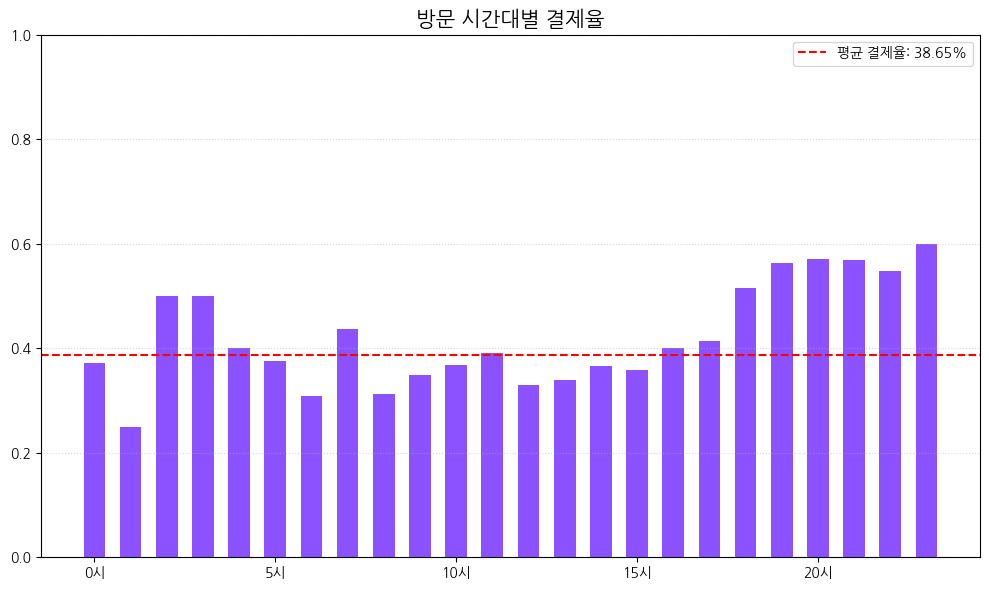

In [ ]:
# 1. 시간대별 전체 방문자 수
total_per_hour = df.groupby('enter_time').size()

# 2. 시간대별 결제자 수
paid_per_hour = df[df['is_payment'] == 1].groupby('enter_time').size()

# 3. 결제율 계산
payment_rate = (paid_per_hour / total_per_hour).fillna(0)

# 4. 정렬된 시간대 기준으로 재정렬
hours = sorted(df['enter_time'].unique())
payment_rate = payment_rate.reindex(hours, fill_value=0)

# 5. 시각화
plt.figure(figsize=(10, 6))
plt.bar(hours, payment_rate.values, color='#8c52ff', width=0.6)

# 평균 결제율 선 추가
mean_rate = df['is_payment'].mean()
plt.axhline(y=mean_rate, color='red', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_rate:.2%}')

# 스타일링
# ✅ X축: 5시간 간격
plt.xticks(ticks=range(0, 24, 5), labels=[f'{h}시' for h in range(0, 24, 5)])
plt.xlabel('', fontsize=12)
plt.ylabel('')
plt.title('방문 시간대별 결제율', fontsize=15)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

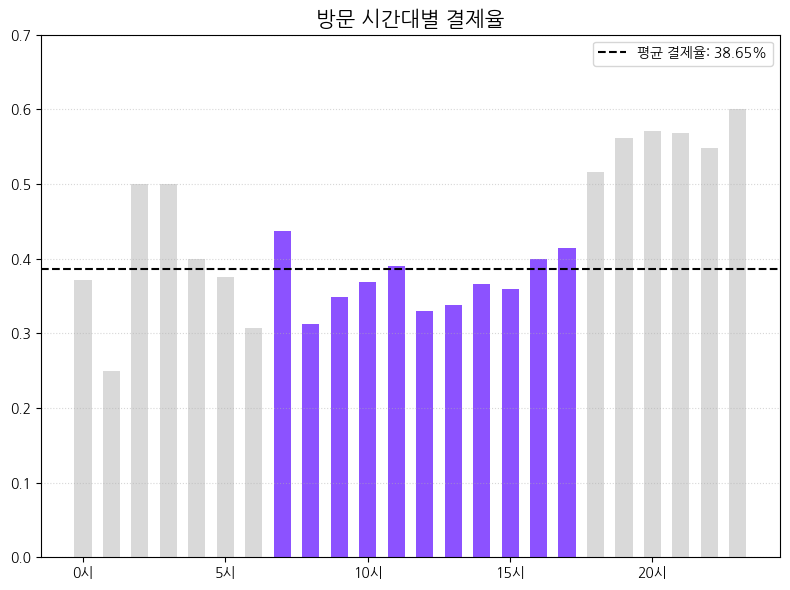

In [ ]:
# 색상 지정: 07~17시는 보라색, 나머지는 회색
colors = ['#8c52ff' if 7 <= h <= 17 else '#d9d9d9' for h in hours]

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(hours, payment_rate.values, color=colors, width=0.6)

# 평균 결제율 선 추가
mean_rate = df['is_payment'].mean()
plt.axhline(y=mean_rate, color='black', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_rate:.2%}')

# 스타일링
plt.xticks(ticks=range(0, 24, 5), labels=[f'{h}시' for h in range(0, 24, 5)])
plt.xlabel('', fontsize=12)
plt.ylabel('')
plt.title('방문 시간대별 결제율', fontsize=15)
plt.ylim(0, 0.7)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

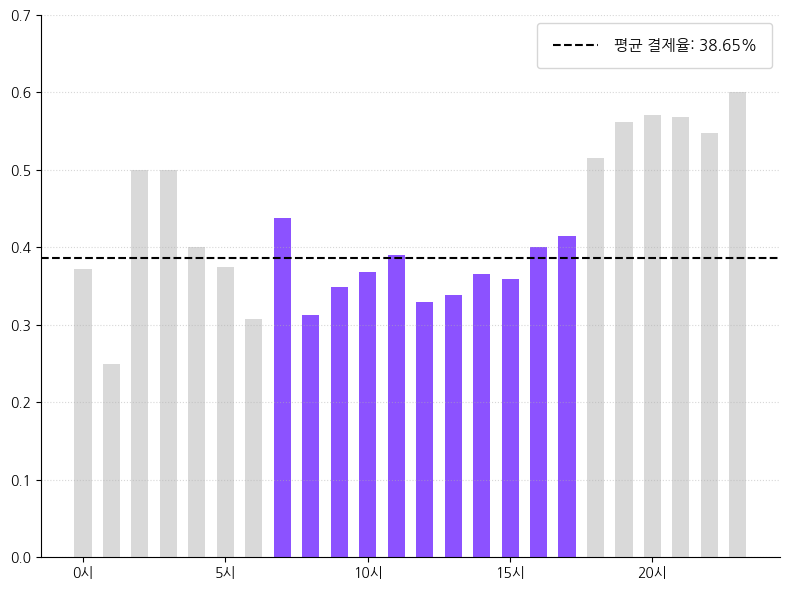

In [ ]:
# 평균선 먼저 계산
mean_rate = df['is_payment'].mean()

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))  # ✅ plt.figure → plt.subplots로 변경 (ax 객체 활용)

# 막대그래프
colors = ['#8c52ff' if 7 <= h <= 17 else '#d9d9d9' for h in hours]
ax.bar(hours, payment_rate.values, color=colors, width=0.6)

# 평균선
ax.axhline(y=mean_rate, color='black', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_rate:.2%}')

# 스타일링
ax.set_xticks(ticks=range(0, 24, 5))
ax.set_xticklabels([f'{h}시' for h in range(0, 24, 5)])
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('')
ax.set_ylim(0, 0.7)
ax.grid(axis='y', linestyle=':', alpha=0.5)
ax.legend()

# ✅ 테두리 제거 (상단 + 오른쪽)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 7. 범례
plt.legend(
    fontsize=11,
    handlelength=3,
    handletextpad=1.0,
    borderpad=1.0,
    loc='upper right'
)

plt.tight_layout()
plt.show()

/tmp/ipython-input-25-2925998122.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stay_group = df.groupby('stay_bin')['is_payment']


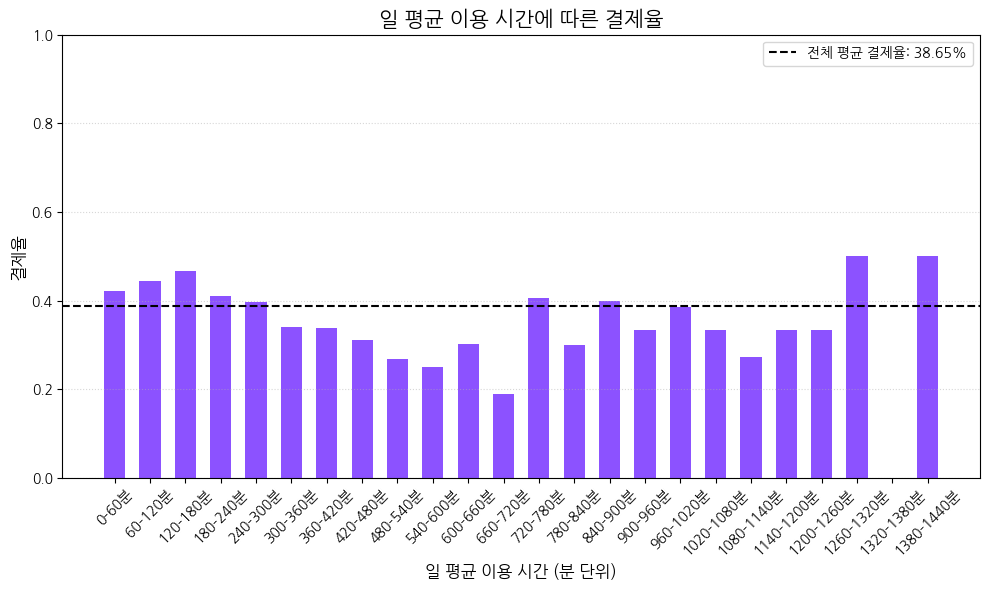

In [ ]:
# 1. 체류 시간 구간(bin) 설정 - 60분 단위로 나눔 (필요시 조정 가능)
bins = range(0, int(df['oneday_stay_time'].max()) + 60, 60)
df['stay_bin'] = pd.cut(df['oneday_stay_time'], bins=bins, right=False)

# 2. 구간별 결제율 계산
stay_group = df.groupby('stay_bin')['is_payment']
total = stay_group.count()
paid = stay_group.sum()
payment_rate = (paid / total).fillna(0)

# 3. 시각화용 라벨 만들기
x_labels = [f'{int(interval.left)}–{int(interval.right)}분' for interval in payment_rate.index]

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.bar(x_labels, payment_rate.values, color='#8c52ff', width=0.6)

# 평균 결제율 선 추가
mean_rate = df['is_payment'].mean()
plt.axhline(mean_rate, color='black', linestyle='--', linewidth=1.5, label=f'전체 평균 결제율: {mean_rate:.2%}')

# 스타일
plt.xticks(rotation=45)
plt.xlabel('일 평균 이용 시간 (분 단위)', fontsize=12)
plt.ylabel('결제율', fontsize=12)
plt.title('일 평균 이용 시간에 따른 결제율', fontsize=15)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
payment_rate

,is_payment
stay_bin,
"[0, 60)",0.420968
"[60, 120)",0.445070
"[120, 180)",0.466586
"[180, 240)",0.409924
"[240, 300)",0.395514
"[300, 360)",0.339568
"[360, 420)",0.337165
"[420, 480)",0.309795
"[480, 540)",0.268775


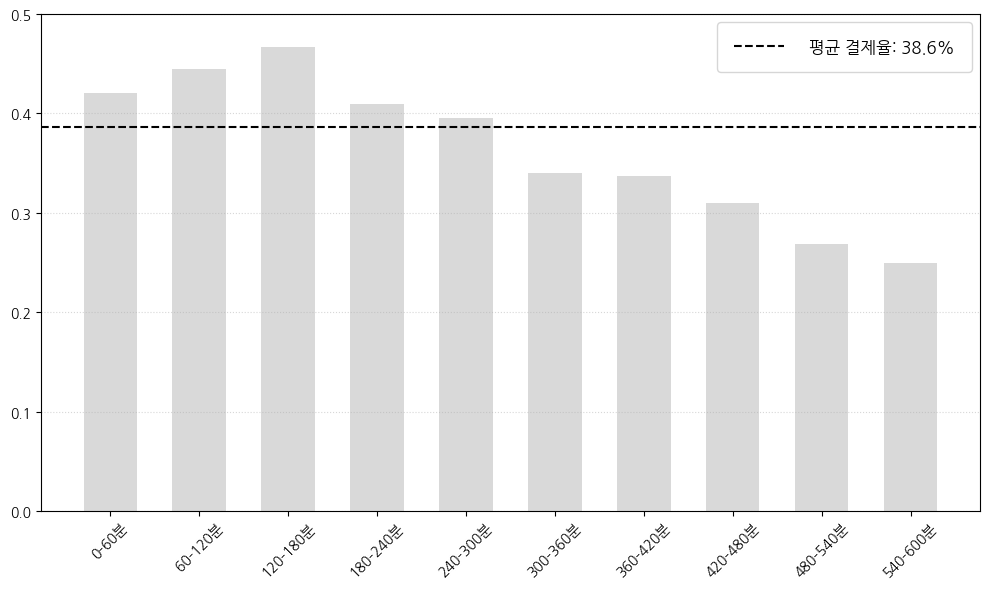

In [ ]:
# 1. 평균 결제율 계산
mean_rate = df['is_payment'].mean()

# 2. 필터링: 660분 미만 구간만 사용
filtered_payment_rate = payment_rate[payment_rate.index.map(lambda x: x.left < 660)]

# → 마지막 막대 제외
filtered_payment_rate = filtered_payment_rate[:-1]

# 3. 색상: 모두 회색
colors = ['#d9d9d9'] * len(filtered_payment_rate)

# 4. 시각화용 라벨
x_labels = [f'{int(interval.left)}–{int(interval.right)}분' for interval in filtered_payment_rate.index]

# 5. 시각화
plt.figure(figsize=(10, 6))
plt.bar(x_labels, filtered_payment_rate.values, color=colors, width=0.6)

# 평균 결제율 선
plt.axhline(mean_rate, color='black', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_rate:.1%}')

# 스타일
plt.xticks(rotation=45)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle=':', alpha=0.5)

# 범례 스타일 조정
plt.legend(
    fontsize=12,
    borderpad=1.0,
    labelspacing=1.2,
    handlelength=3,
    handletextpad=1.5,
    loc='upper right'
)

plt.tight_layout()
plt.show()

In [ ]:
# 1. 평균 결제율 계산
mean_rate = df['is_payment'].mean()

# 2. 필터링: 660분 미만 구간만 사용
filtered_payment_rate = payment_rate[payment_rate.index.map(lambda x: x.left < 660)]

# 3. 색상 조건: 평균 이상이면 보라색, 아니면 회색
colors = ['#8c52ff' if rate >= mean_rate else '#d9d9d9' for rate in filtered_payment_rate.values]

# 4. 시각화용 라벨
x_labels = [f'{int(interval.left)}–{int(interval.right)}분' for interval in filtered_payment_rate.index]

# 5. 시각화
plt.figure(figsize=(10, 6))
plt.bar(x_labels, filtered_payment_rate.values, color=colors, width=0.6)

# 평균 결제율 선
plt.axhline(mean_rate, color='black', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_rate:.1%}')

# 스타일
plt.xticks(rotation=45)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle=':', alpha=0.5)


# 범례 스타일 조정: 크기와 여백 키우기
plt.legend(
    fontsize=12,        # 텍스트 크기
    borderpad=1.0,      # 테두리 안 여백
    labelspacing=1.2,   # 항목 간 간격
    handlelength=3,     # 마커 길이
    handletextpad=1.5,  # 마커와 텍스트 간 간격
    loc='upper right'
)

plt.tight_layout()
plt.show()

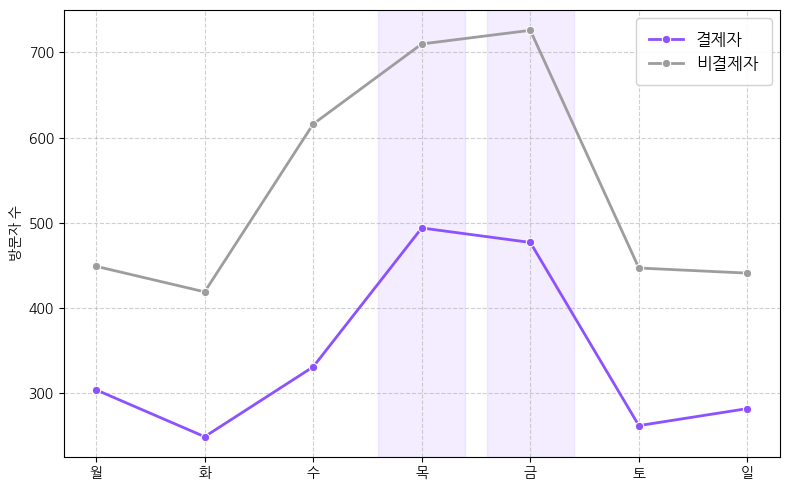

In [ ]:
# 1. 요일별 방문자 수 집계
day_counts_all = df.groupby(['visit_dayofweek', 'is_payment']).size().unstack(fill_value=0)

# 2. 요일 이름 매핑
day_labels = ['월', '화', '수', '목', '금', '토', '일']
day_counts_all.index.name = None
day_counts_all = day_counts_all.sort_index()  # 0(월)~6(일) 순서 정렬

# 3. Top2 요일 (결제자 기준)
top2_indices = day_counts_all[1].sort_values(ascending=False).head(2).index.tolist()

# 4. 시각화 시작
plt.figure(figsize=(8, 5))

# ✅ Top2 요일 음영 강조
for idx in day_counts_all.index:
    if idx in top2_indices:
        plt.axvspan(idx - 0.4, idx + 0.4, color='#8c52ff', alpha=0.1)

# 5. 라인 그래프 그리기
sns.lineplot(x=day_counts_all.index, y=day_counts_all[1], marker='o', linewidth=2, label='결제자', color='#8c52ff')
sns.lineplot(x=day_counts_all.index, y=day_counts_all[0], marker='o', linewidth=2, label='비결제자', color='#9d9d9d')

# 6. X축 요일 이름 지정
plt.xticks(ticks=day_counts_all.index, labels=[day_labels[i] for i in day_counts_all.index])


# 스타일링
plt.legend(
    title_fontsize=12,
    fontsize=12,           # ✅ 범례 항목 폰트 크기
    loc='upper right',     # 위치 (기본은 best)
    frameon=True,          # 박스 표시 여부
    framealpha=0.9,        # 투명도
    borderpad=0.8          # 박스 안쪽 여백
)

plt.xlabel('')
plt.ylabel('방문자 수')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* 전체 방문자들이 방문한 요일에 따른 결제 전환율은 평일에는 뚜렷한 차이가 없으며, 주말에 다소 감소하는 경향을 보임
* 요일에 관계없이 결제하지 않은 이용자들이 더 많이 방문함

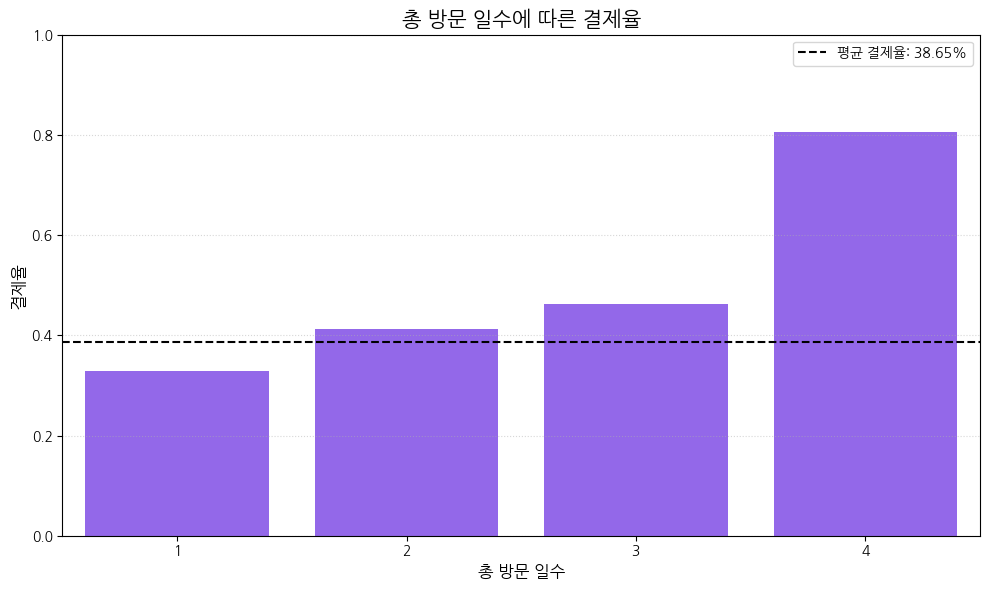

In [ ]:
# df의 date_cnt에 따른 결제율 계산
date_cnt_payment_rate = df.groupby('date_cnt')['is_payment'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=date_cnt_payment_rate, x='date_cnt', y='is_payment', color='#8c52ff')

# 평균 결제율 선 추가
mean_conversion_rate = df['is_payment'].mean()
plt.axhline(mean_conversion_rate, color='black', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_conversion_rate:.2%}')

# 스타일
plt.title('총 방문 일수에 따른 결제율', fontsize=15)
plt.xlabel('총 방문 일수', fontsize=12)
plt.ylabel('결제율', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-49-438225449.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=date_cnt_payment_rate, x='date_cnt', y='is_payment', palette=colors)


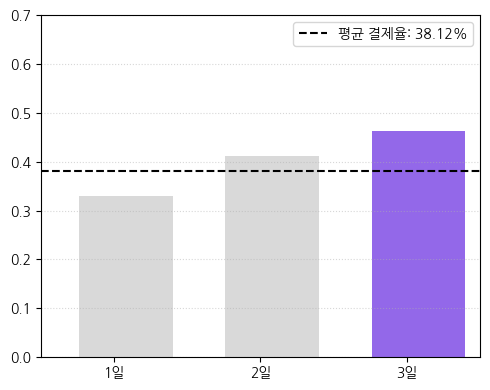

In [ ]:
# 1. date_cnt == 4 제거
filtered_df = df[df['date_cnt'] != 4]
date_cnt_payment_rate = filtered_df.groupby('date_cnt')['is_payment'].mean().reset_index()

# 2. 평균 결제율
mean_conversion_rate = filtered_df['is_payment'].mean()

# 3. 색상 리스트
colors = ['#d9d9d9'] * (len(date_cnt_payment_rate) - 1) + ['#8c52ff']

# 4. 그래프 그리기
plt.figure(figsize=(5, 4))
ax = sns.barplot(data=date_cnt_payment_rate, x='date_cnt', y='is_payment', palette=colors)

# ✅ 막대 너비 조정 (좁게)
for patch in ax.patches:
    current_width = patch.get_width()
    patch.set_width(current_width * 0.8)  # 60% 너비로 줄이기
    patch.set_x(patch.get_x() + current_width * 0.2)  # 가운데 정렬되도록 위치 조정

# 5. 평균선
plt.axhline(mean_conversion_rate, color='black', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_conversion_rate:.2%}')

# 6. X축 라벨 'n일'로 변환
xticks = date_cnt_payment_rate['date_cnt']
xtick_labels = [f'{x}일' for x in xticks]
plt.xticks(ticks=range(len(xticks)), labels=xtick_labels)

plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.ylim(0, 0.7)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-59-2058648047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=visit_gap_payment_rate, x='days_until_visit', y='is_payment', palette=colors)


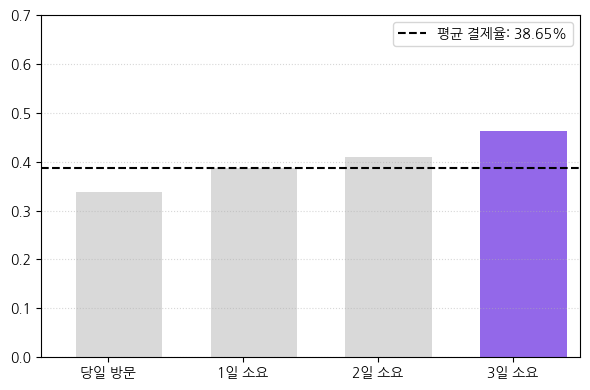

In [ ]:
# 방문 예정일까지 남은 일수에 따른 결제율
# 1. days_until_visit별 결제율 계산
visit_gap_payment_rate = df.groupby('days_until_visit')['is_payment'].mean().reset_index()

# 2. 평균 결제율
mean_rate = df['is_payment'].mean()

# 3. 색상 지정 (마지막 막대만 보라색)
colors = ['#d9d9d9'] * (len(visit_gap_payment_rate) - 1) + ['#8c52ff']

# 4. 시각화
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=visit_gap_payment_rate, x='days_until_visit', y='is_payment', palette=colors)

# ✅ 막대 너비 좁히기
for patch in ax.patches:
    width = patch.get_width()
    patch.set_width(width * 0.8)
    patch.set_x(patch.get_x() + width * 0.2)

# ✅ X축 라벨 커스터마이징
xticks = visit_gap_payment_rate['days_until_visit'].tolist()
xtick_labels = ['당일 방문' if x == 0 else f'{x}일 소요' for x in xticks]
plt.xticks(ticks=range(len(xticks)), labels=xtick_labels)

# 5. 평균선
plt.axhline(mean_rate, color='black', linestyle='--', linewidth=1.5, label=f'평균 결제율: {mean_rate:.2%}')

# 6. 스타일링
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.ylim(0, 0.7)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()